In [1]:
def IntialiseEnv():
    nb_dir = os.path.split(os.getcwd())[0]
    if nb_dir not in sys.path:
        sys.path.append(nb_dir)

    invalid_path='/opt/ros/kinetic/lib/python2.7/dist-packages'
    if invalid_path in sys.path:
        sys.path.remove(invalid_path)

In [2]:
## Import libraries need to be imported, Dont forget to update requirements.txt!
import os
import sys
IntialiseEnv()
import numpy as np
import cv2
import skimage.color
import skimage.filters
import skimage.io
import matplotlib.pyplot as plt
import import_ipynb
from Data_Preparation.Data_Preparation import *

importing Jupyter notebook from /home/rana/Documents/Deep_Learning/Project/Traffic_Sign_Recognition_Detection/Source_Code/Data_Preparation/Data_Preparation.ipynb


In [3]:
## Sharpen Image
def sharpen(img):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    im = cv2.filter2D(img, -1, kernel)
    plt.imshow(im)
    return im

In [4]:
# Excessive sharpening image
def excessive(img):
    kernel = np.array([[1,1,1], [1,-7,1], [1,1,1]])
    im = cv2.filter2D(img, -1, kernel)
    return im

In [5]:
# Blur of images
def blur(img):
    blur =  cv2.medianBlur(img,5)
    return blur

In [6]:
# Edge Enhancement
def edgeEnhancement(img):
    kernel = np.array([[-1,-1,-1,-1,-1],
                               [-1,2,2,2,-1],
                               [-1,2,8,2,-1],
                               [-2,2,2,2,-1],
                               [-1,-1,-1,-1,-1]])/8.0
    img = cv2.filter2D(img, -1, kernel)
    image=cv2.filter2D(img, -1, kernel)
    return image

In [7]:
# Weight image with another image
def addWeightedImg(img,blur):
    result = cv2.addWeighted(img, 1, blur, -0.5, 0)
    return result

In [8]:
# Contrast Enhancement
def ContrastEnhancement():
    hsvImg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsvImg[...,1] = hsvImg[...,1]*1.6
    hsvImg[...,2] = hsvImg[...,2]*0.8
    img=cv2.cvtColor(hsvImg,cv2.COLOR_HSV2RGB)

In [9]:
#Edge Detection
def CannyEdgeDetection(img):
    edged=cv2.Canny(img,60,150)

In [10]:
# Find Contours
def FindContours(edged):
    contours, hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(img,contours,-1,(0,255,0),1)
    ret =40
    img[img>ret]=255
    img[img<=ret]=0
    img =cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [11]:
def Convert2Grayscale(img):
    return skimage.color.rgb2gray(img)

In [12]:
def ThresholdSegmentationOtsu(img):
    t = skimage.filters.threshold_otsu(img)
    mask = img > t
    return mask

In [13]:
def RemoveNoiseColouredImg(img):
    dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

In [22]:
def ProposedSegmentationAlgo(path):
    img=loadSampleImg(path)
    img_to_yuv = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
    img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
    hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2RGB)
    edgeEnhanced=edgeEnhancement(hist_equalization_result)
    gray= Convert2Grayscale(edgeEnhanced)
    fig, ax = plt.subplots(nrows=1, ncols=4)
    ax[0].imshow(img)
    ax[1].imshow(hist_equalization_result)
    ax[2].imshow(edgeEnhanced)
    ax[3].imshow(gray)
    plt.show() 

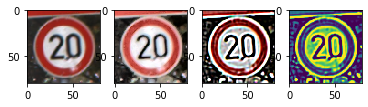

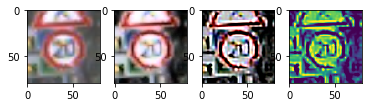

In [23]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00000/00000_00024.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00000/00000_00000.ppm')

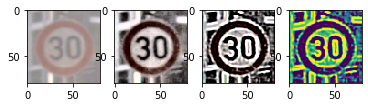

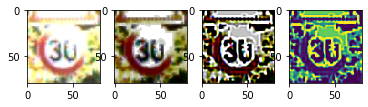

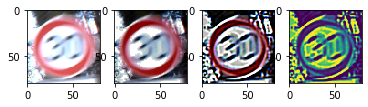

In [24]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00001/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00001/00001_00008.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00001/00042_00029.ppm')

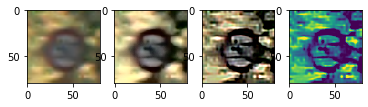

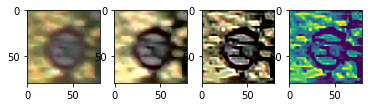

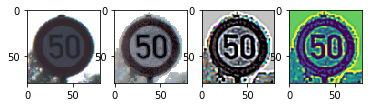

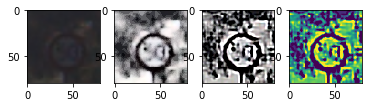

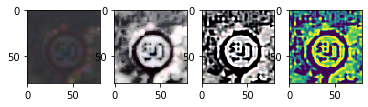

In [25]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00002/00002_00002.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00002/00002_00003.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00002/00001_00026.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00002/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00002/00001_00005.ppm')

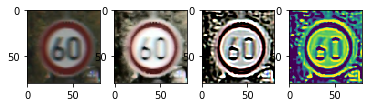

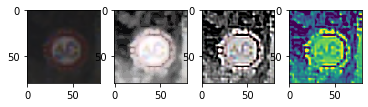

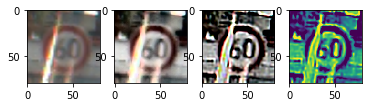

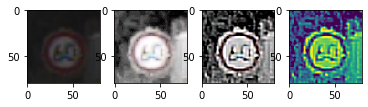

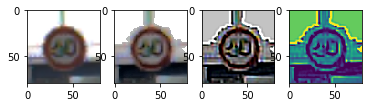

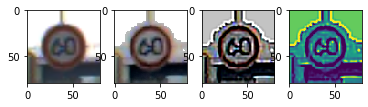

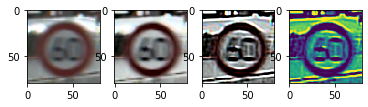

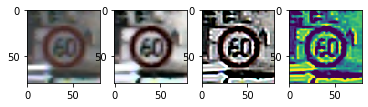

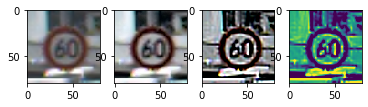

In [27]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00003/00004_00022.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00003/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00003/00001_00016.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00003/00000_00006.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00003/00002_00002.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00003/00002_00003.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00003/00001_00026.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00003/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00003/00001_00005.ppm')

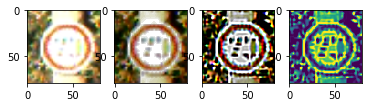

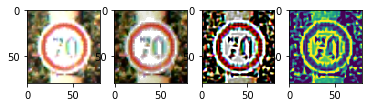

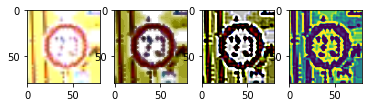

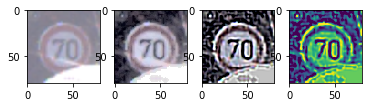

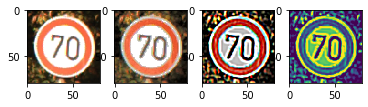

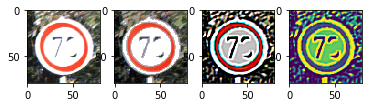

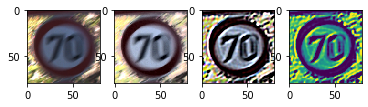

In [33]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00004/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00004/00000_00008.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00004/00002_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00004/00001_00001.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00004/00047_00026.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00004/00005_00029.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00004/00006_00029.ppm')

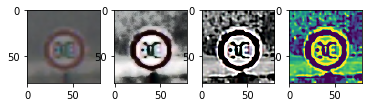

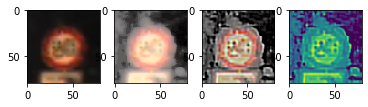

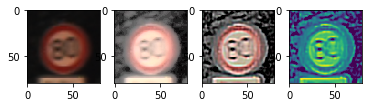

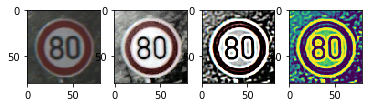

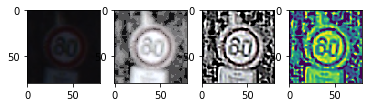

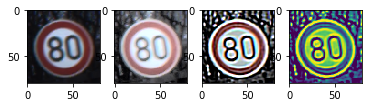

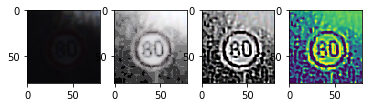

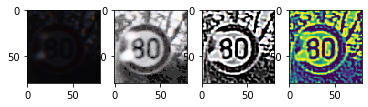

In [49]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00005/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00005/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00005/00001_00028.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00005/00000_00026.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00005/00007_00010.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00005/00047_00026.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00005/00011_00006.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00005/00010_00026.ppm')

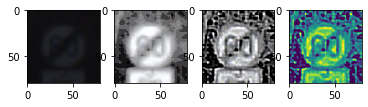

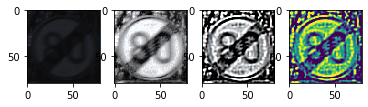

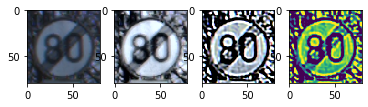

In [41]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00006/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00006/00000_00029.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00006/00003_00025.ppm')

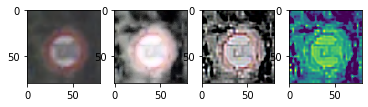

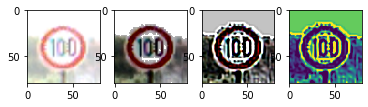

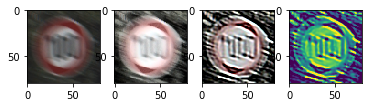

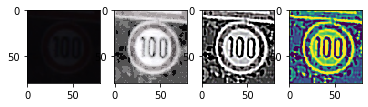

In [44]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00007/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00007/00002_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00007/00000_00028.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00007/00004_00017.ppm')

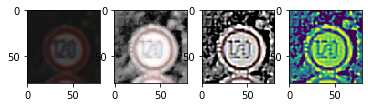

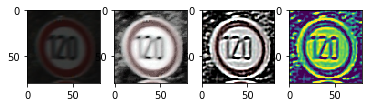

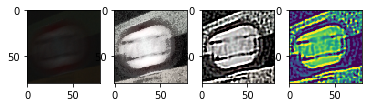

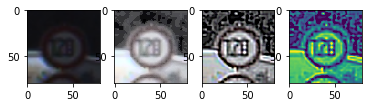

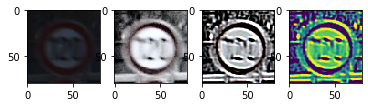

In [48]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00008/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00008/00000_00029.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00008/00002_00029.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00008/00005_00002.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00008/00007_00026.ppm')

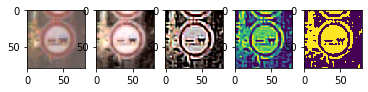

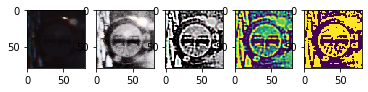

In [157]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00009/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00009/00047_00026.ppm')

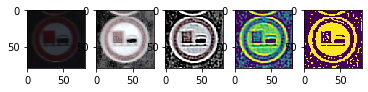

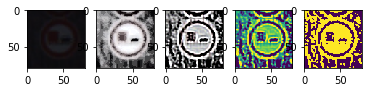

In [158]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00010/00007_00024.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00010/00008_00012.ppm')

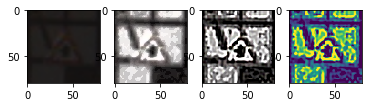

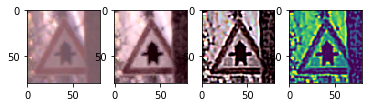

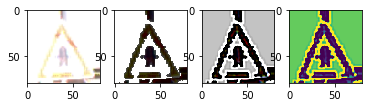

In [51]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00011/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00011/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00011/00002_00001.ppm')

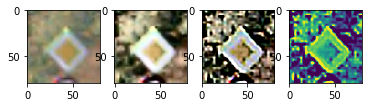

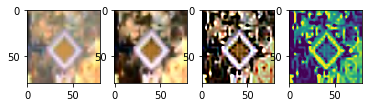

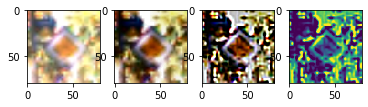

In [52]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00012/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00012/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00012/00002_00001.ppm')

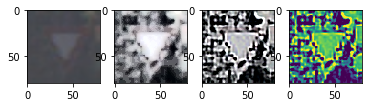

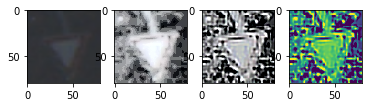

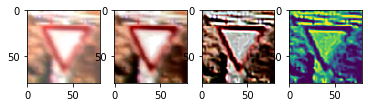

In [53]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00013/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00013/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00013/00002_00001.ppm')

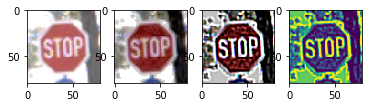

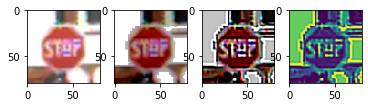

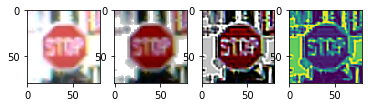

In [54]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00014/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00014/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00014/00002_00001.ppm')

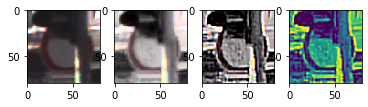

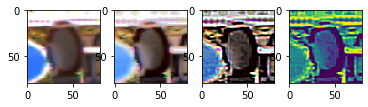

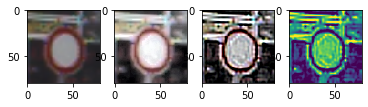

In [55]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00015/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00015/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00015/00002_00001.ppm')

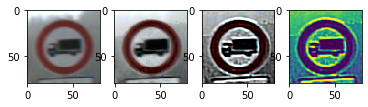

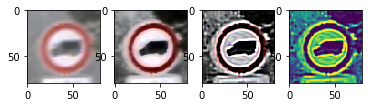

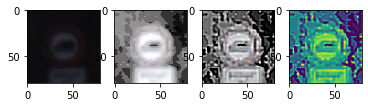

In [56]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00016/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00016/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00016/00002_00001.ppm')

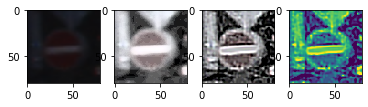

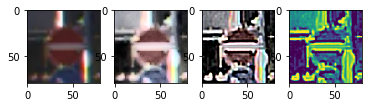

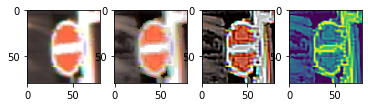

In [57]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00017/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00017/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00017/00002_00001.ppm')

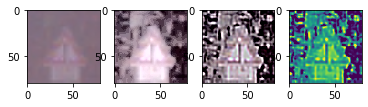

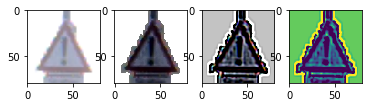

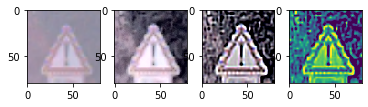

In [58]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00018/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00018/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00018/00002_00001.ppm')

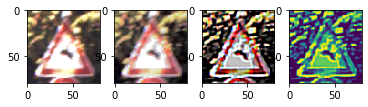

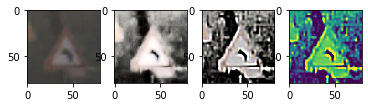

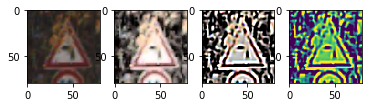

In [59]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00019/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00019/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00019/00002_00001.ppm')

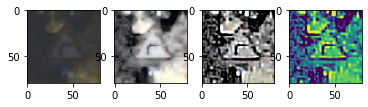

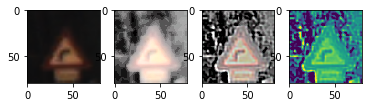

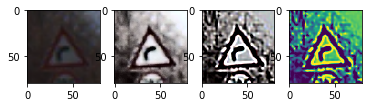

In [60]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00020/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00020/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00020/00002_00001.ppm')

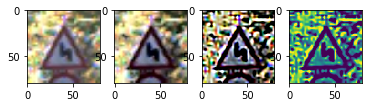

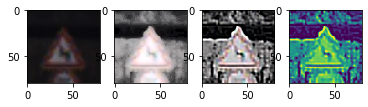

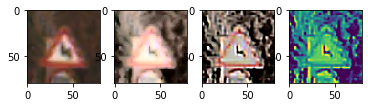

In [61]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00021/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00021/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00021/00002_00001.ppm')

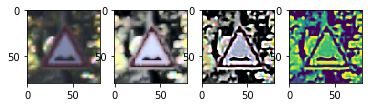

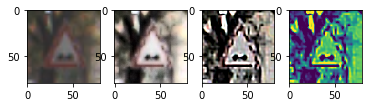

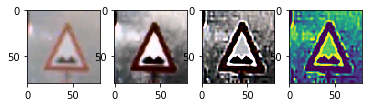

In [62]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00022/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00022/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00022/00002_00001.ppm')

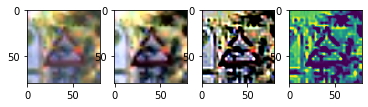

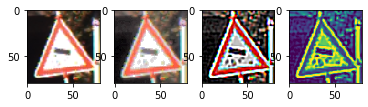

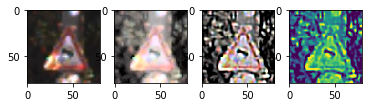

In [63]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00023/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00023/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00023/00002_00001.ppm')

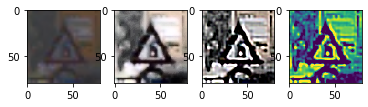

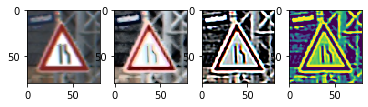

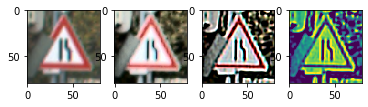

In [64]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00024/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00024/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00024/00002_00001.ppm')

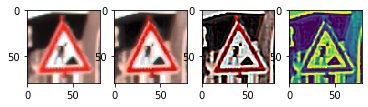

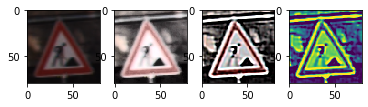

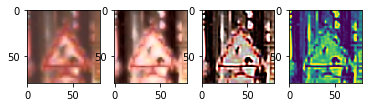

In [65]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00025/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00025/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00025/00002_00001.ppm')

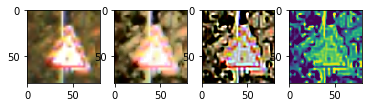

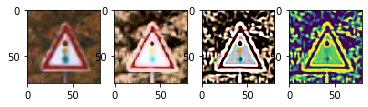

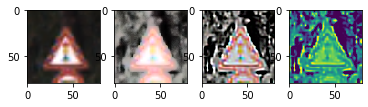

In [66]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00026/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00026/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00026/00002_00001.ppm')

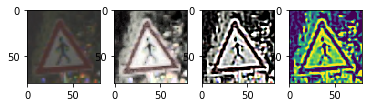

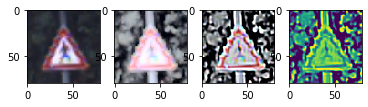

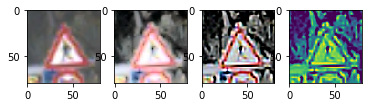

In [67]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00027/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00027/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00027/00002_00001.ppm')

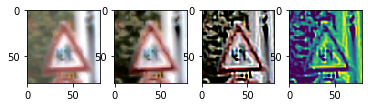

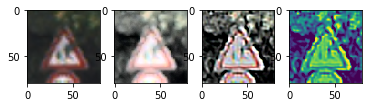

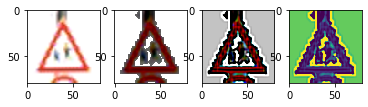

In [68]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00028/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00028/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00028/00002_00001.ppm')

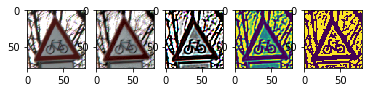

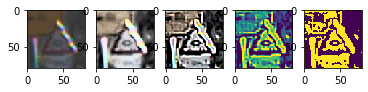

In [165]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00029/00004_00028.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00029/00006_00002.ppm')

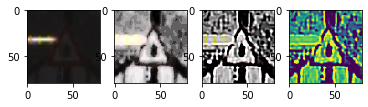

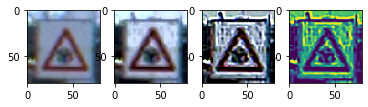

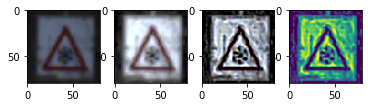

In [69]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00030/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00030/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00030/00002_00001.ppm')

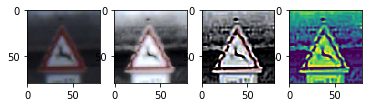

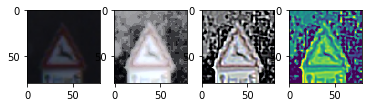

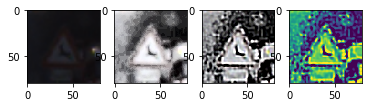

In [70]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00031/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00031/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00031/00002_00001.ppm')

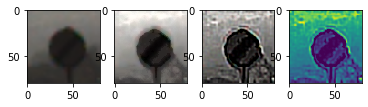

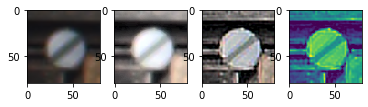

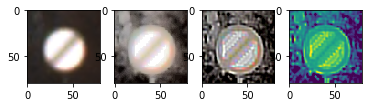

In [71]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00032/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00032/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00032/00002_00001.ppm')

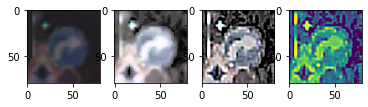

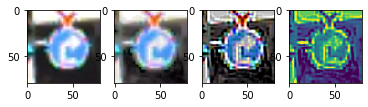

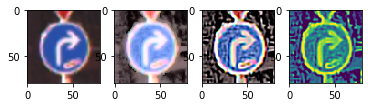

In [72]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00033/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00033/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00033/00002_00001.ppm')

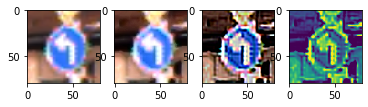

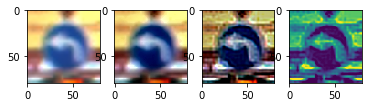

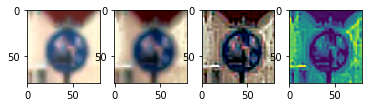

In [73]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00034/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00034/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00034/00002_00001.ppm')

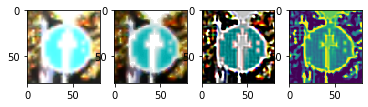

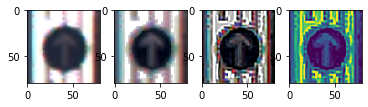

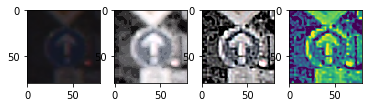

In [74]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00035/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00035/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00035/00002_00001.ppm')

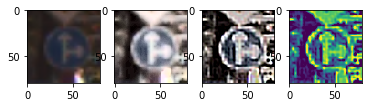

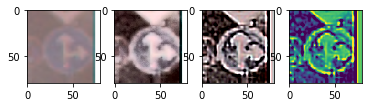

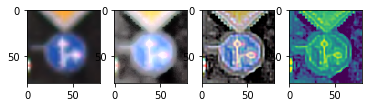

In [75]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00036/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00036/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00036/00002_00001.ppm')

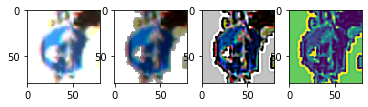

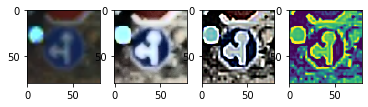

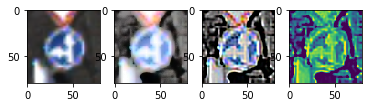

In [76]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00037/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00037/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00037/00002_00001.ppm')

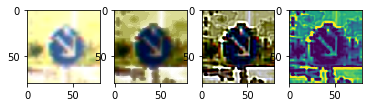

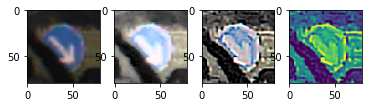

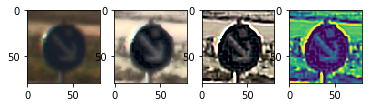

In [77]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00038/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00038/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00038/00002_00001.ppm')

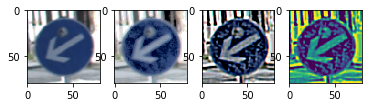

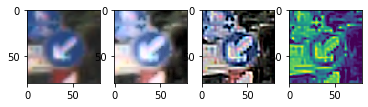

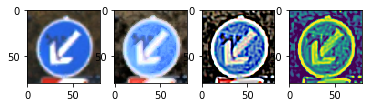

In [78]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00039/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00039/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00039/00002_00001.ppm')

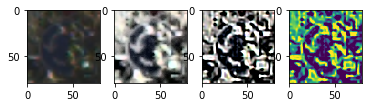

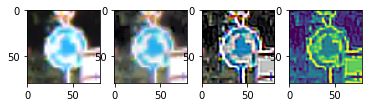

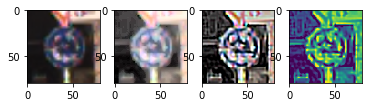

In [79]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00040/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00040/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00040/00002_00001.ppm')

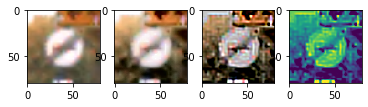

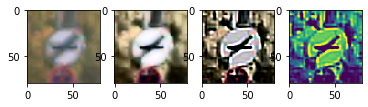

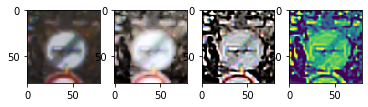

In [80]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00041/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00041/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00041/00002_00001.ppm')

In [ ]:
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00042/00000_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00015/00001_00000.ppm')
ProposedSegmentationAlgo('../DataSet/Training_DataSet/Final_Training/Images/00015/00002_00001.ppm')